Customer Churn Analysis
Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.
Downlaod Files:

    https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import statistics as stat

In [2]:
df=pd.read_csv('Customer Churn Analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
for i in df.select_dtypes(['object']).columns:
    print(i,':',df[i].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


<AxesSubplot:>

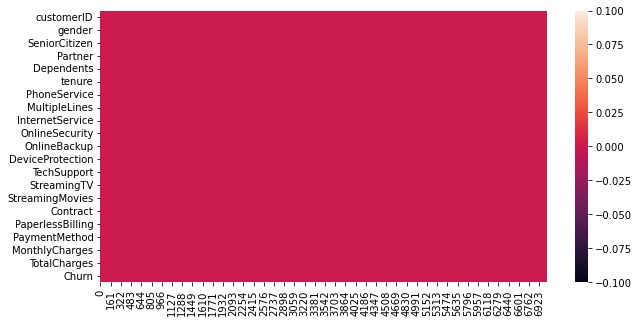

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull().transpose())

<AxesSubplot:xlabel='Churn', ylabel='count'>

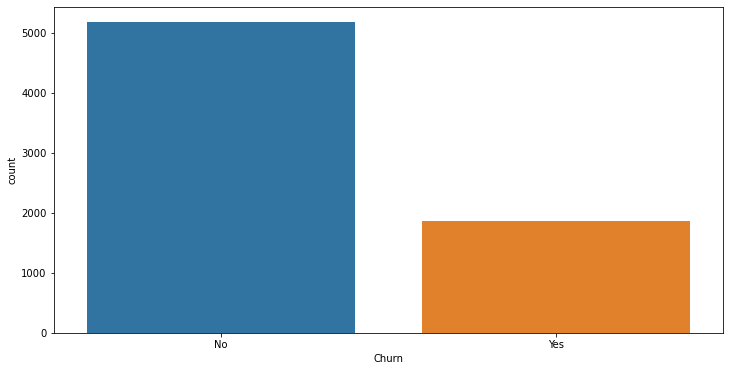

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Churn',data=df)

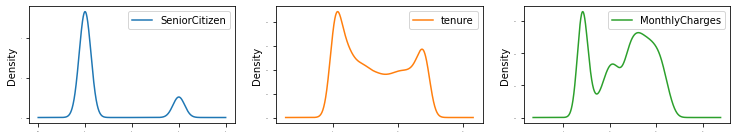

In [8]:
df.plot(kind='density',subplots=True,layout=(6,4),sharex=False,fontsize=1,figsize=(17,15))
plt.show()

# Applying LevelEncoder

In [9]:
df.select_dtypes(['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
col=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for i in col:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


# Data Description

In [12]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


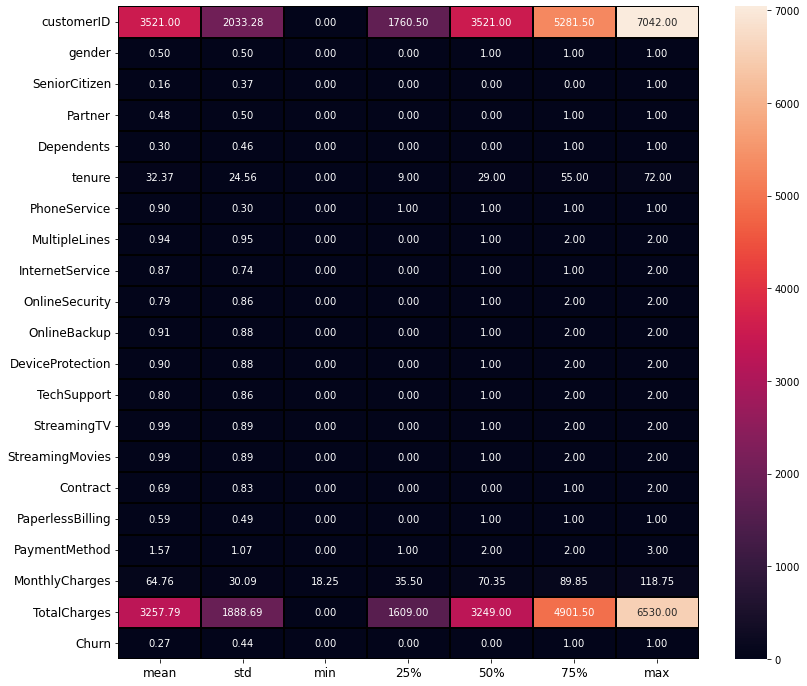

In [13]:
plt.figure(figsize=(13,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Data Correlation

In [14]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<AxesSubplot:>

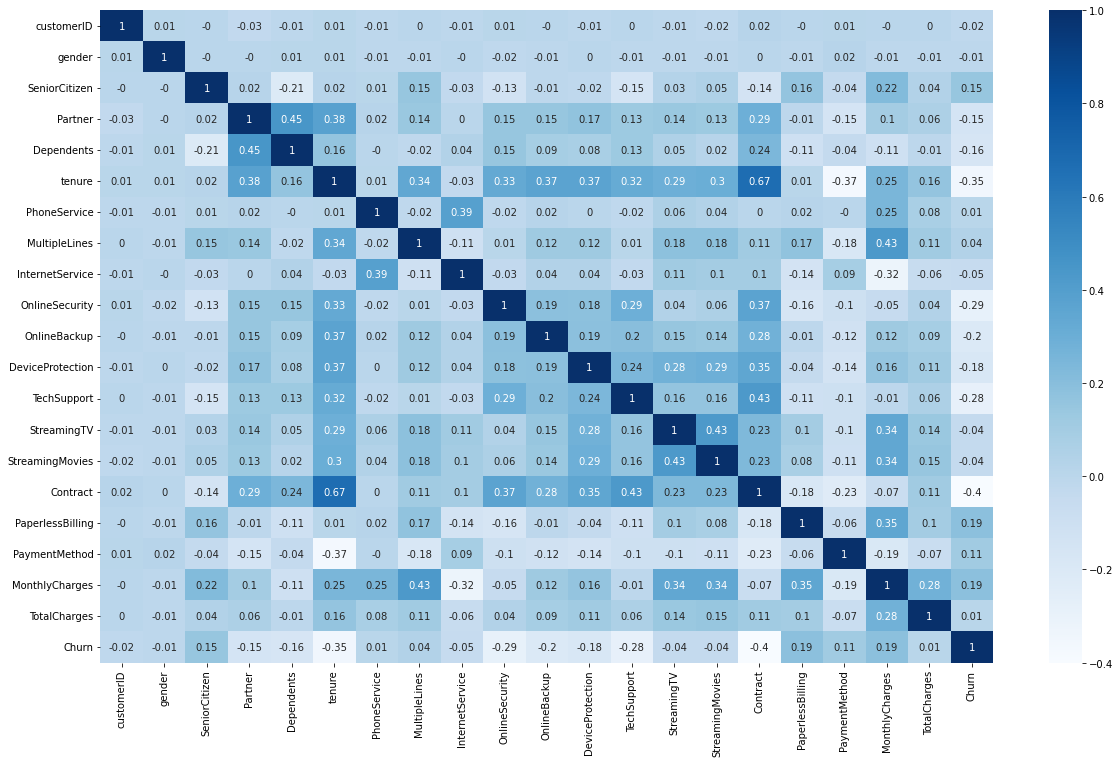

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(round(df.corr(),2),cmap='Blues',annot=True)

In [16]:
df.corr()['Churn']

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
Name: Churn, dtype: float64

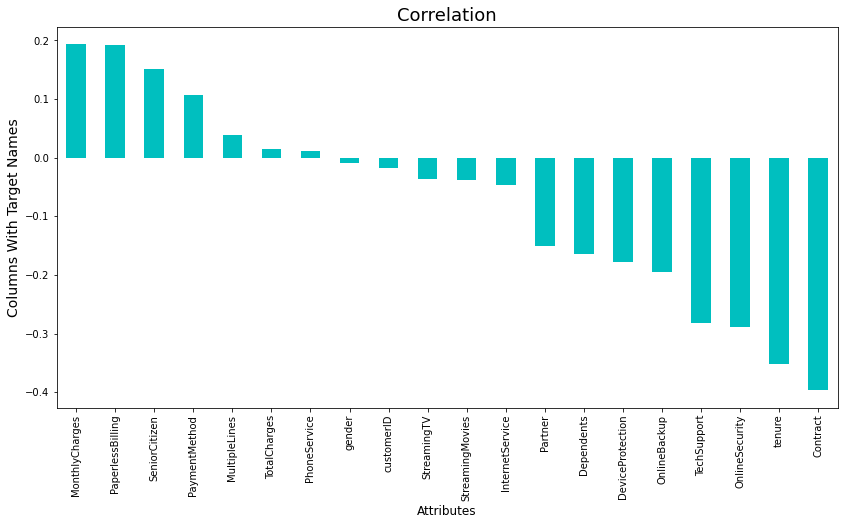

In [17]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=12)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Outliers

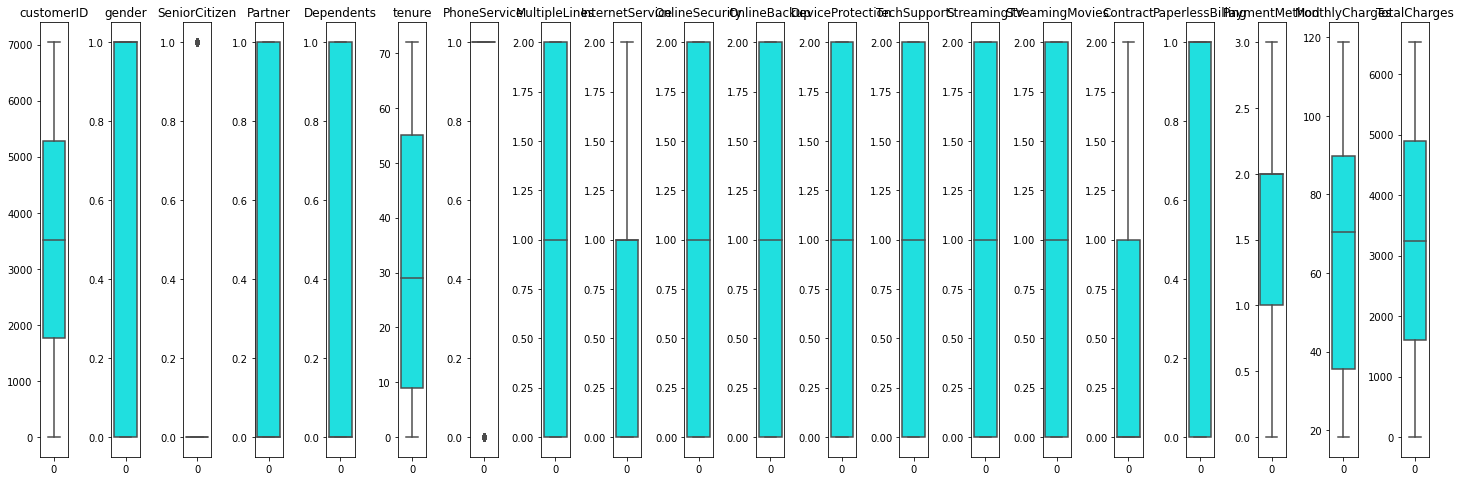

In [18]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    plt.title(df.columns[i])
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['Churn'],axis=1)))
z.shape

(7043, 20)

In [20]:
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [21]:
len(np.where(z>3)[0])

682

In [22]:
df_new=df[(z<3).all(axis=1)]

In [23]:
print('Data Lost: ',round(((len(df)-len(df_new))*100)/len(df),2),'%')

Data Lost:  9.68 %


In [24]:
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0


In [25]:
x=df_new.drop(['Churn'],axis=1)
y=df_new['Churn']

# Balancing Data

In [26]:
import sklearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_new,y=smt.fit_resample(x,y)
x=pd.DataFrame(x_new,columns=x.columns)

<AxesSubplot:xlabel='Churn', ylabel='count'>

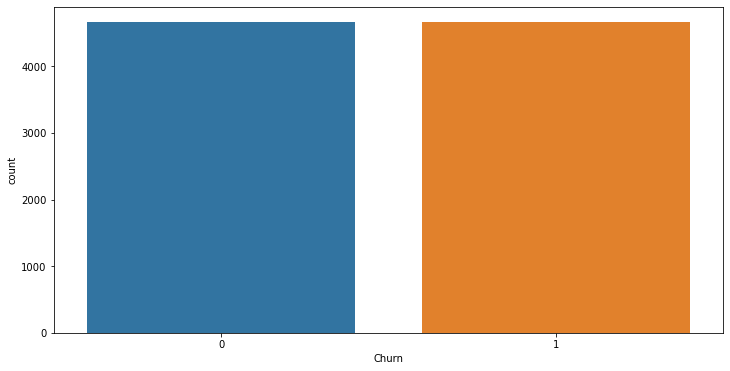

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x=y)

# Standard Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.222913,1.170258,-0.387266,-0.770084,-0.523065,0.276367,0.0,-0.916266,-1.357449,1.763245,-0.887402,1.501949,-0.767407,-1.035059,-1.041391,0.677276,-1.185830,1.473698,-0.486969,-0.960715
1,-0.466863,1.170258,-0.387266,-0.770084,-0.523065,-1.093341,0.0,-0.916266,-1.357449,1.763245,1.511246,-0.890495,-0.767407,-1.035059,-1.041391,-0.636417,0.843291,1.473698,-0.598568,-1.644784
2,1.480595,-0.854512,-0.387266,-0.770084,-0.523065,-1.093341,0.0,-0.916266,0.159977,-0.759077,-0.887402,-0.890495,-0.767407,-1.035059,-1.041391,-0.636417,0.843291,0.461040,0.008026,-1.243436
3,1.500331,-0.854512,-0.387266,-0.770084,-0.523065,-0.836521,0.0,1.176902,0.159977,-0.759077,-0.887402,1.501949,-0.767407,1.291017,1.284898,-0.636417,0.843291,0.461040,1.050214,1.463052
4,-1.237557,1.170258,-0.387266,-0.770084,1.911810,-0.237273,0.0,1.176902,0.159977,-0.759077,1.511246,-0.890495,-0.767407,1.291017,-1.041391,-0.636417,0.843291,-0.551619,0.670418,-0.916818


# Skew

In [29]:
x.skew()

customerID          0.004674
gender              0.315797
SeniorCitizen       2.195288
Partner             0.528561
Dependents          1.388969
tenure              0.557783
PhoneService        0.000000
MultipleLines       0.250465
InternetService     0.115684
OnlineSecurity      0.834377
OnlineBackup        0.517536
DeviceProtection    0.508359
TechSupport         0.812156
StreamingTV         0.212956
StreamingMovies     0.202377
Contract            1.173850
PaperlessBilling   -0.342594
PaymentMethod      -0.207915
MonthlyCharges     -0.638547
TotalCharges       -0.015045
dtype: float64

# Selecting Best Model

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  81.42428142428142  on Random State:  19
[[897 284]
 [235 915]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1181
           1       0.76      0.80      0.78      1150

    accuracy                           0.78      2331
   macro avg       0.78      0.78      0.78      2331
weighted avg       0.78      0.78      0.78      2331



In [32]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7783196792046854


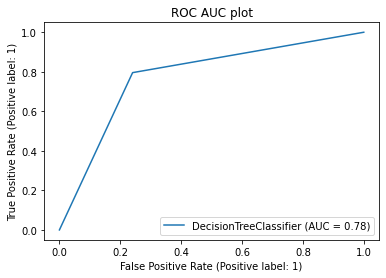

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  87.001287001287  on Random State:  57
[[1005  176]
 [ 168  982]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1181
           1       0.85      0.85      0.85      1150

    accuracy                           0.85      2331
   macro avg       0.85      0.85      0.85      2331
weighted avg       0.85      0.85      0.85      2331



In [35]:
scr=cross_val_score(rf,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8402057899642154


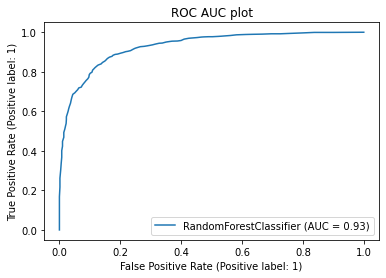

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    acc=accuracy_score(y_test,predkn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Best accuracy:  81.93908193908193  on Random State:  44
[[ 868  313]
 [ 135 1015]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1181
           1       0.76      0.88      0.82      1150

    accuracy                           0.81      2331
   macro avg       0.81      0.81      0.81      2331
weighted avg       0.82      0.81      0.81      2331



In [38]:
scr=cross_val_score(kn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7976229159235523


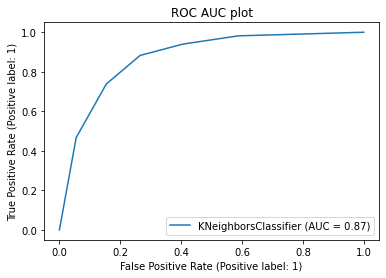

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(kn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# SVC

In [40]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    sv.fit(x_train,y_train)
    predsv=sv.predict(x_test)
    acc=accuracy_score(y_test,predsv)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Best accuracy:  83.09738309738309  on Random State:  14
[[ 905  276]
 [ 146 1004]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1181
           1       0.78      0.87      0.83      1150

    accuracy                           0.82      2331
   macro avg       0.82      0.82      0.82      2331
weighted avg       0.82      0.82      0.82      2331



In [41]:
scr=cross_val_score(sv,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8082418966965447


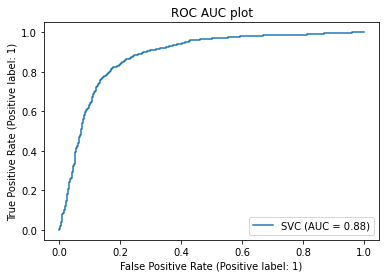

In [42]:
plot_roc_curve(sv,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Gaussian Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    gn.fit(x_train,y_train)
    predgn=gn.predict(x_test)
    acc=accuracy_score(y_test,predgn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

Best accuracy:  82.02488202488203  on Random State:  54
[[924 257]
 [195 955]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1181
           1       0.79      0.83      0.81      1150

    accuracy                           0.81      2331
   macro avg       0.81      0.81      0.81      2331
weighted avg       0.81      0.81      0.81      2331



In [44]:
scr=cross_val_score(gn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7964439816359642


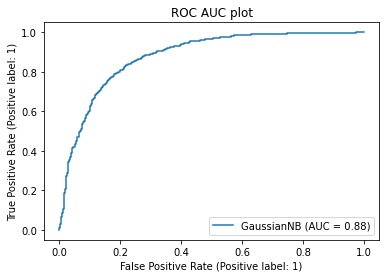

In [45]:
plot_roc_curve(gn,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Best accuracy:  82.75418275418276  on Random State:  33
[[913 268]
 [167 983]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1181
           1       0.79      0.85      0.82      1150

    accuracy                           0.81      2331
   macro avg       0.82      0.81      0.81      2331
weighted avg       0.82      0.81      0.81      2331



In [47]:
scr=cross_val_score(lr,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8044878551128193


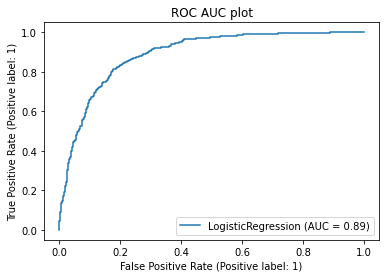

In [48]:
plot_roc_curve(lr,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

# Grid Search CV

In [51]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1', 'l2', 'elasticnet', 'none'],
           'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'multi_class':['auto', 'ovr', 'multinomial'],
           'dual':[bool,False]}
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'dual': False, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [52]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(dual= False, multi_class= 'auto', penalty= 'none', solver= 'newton-cg')
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Best accuracy:  82.75418275418276  on Random State:  33
[[912 269]
 [167 983]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1181
           1       0.79      0.85      0.82      1150

    accuracy                           0.81      2331
   macro avg       0.82      0.81      0.81      2331
weighted avg       0.82      0.81      0.81      2331



In [53]:
import joblib
joblib.dump(lr,'Customer Churn Model.pkl')

['Customer Churn Model.pkl']